The new AIPS layout will have global segmentation initially, followed by basic Bayesian categorization, switching later to cellpose segmentation and concluding with pytorch CNN phenotypic cell identification. 

0) Images with extremely low or high standard deviation will be ignored

In [1]:
import numpy as np
from skimage import measure, morphology
from skimage.transform import resize
from skimage import io
import skimage
from skimage.util import img_as_ubyte
import pandas as pd
from random import randint
from cellpose import models, core
from skimage import img_as_ubyte
from skimage.draw import disk
from skimage import measure
from skimage import exposure
from PIL import Image, ImageDraw,ImageFont
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import os
import re
import random
import string
from IPython.display import clear_output
import cv2
import glob
import pdb

/tmp/ipykernel_3990215/11039631.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [23]:
# functions:
def rgbImge(image_input,ci=10):
    input_gs_image = (image_input / image_input.max()) * 255
    ch2_u8 = np.uint8(input_gs_image*ci)
    rgb_input_img = np.zeros((np.shape(ch2_u8)[0], np.shape(ch2_u8)[1], 3), dtype=np.uint8)
    rgb_input_img[:, :, 0] = ch2_u8
    rgb_input_img[:, :, 1] = ch2_u8
    rgb_input_img[:, :, 2] = ch2_u8
    pilimage = Image.fromarray(rgb_input_img)
    return pilimage

def tableDispalyImage(df,files,columnName = 'sd'):
    df = df.sort_values(columnName,ascending=True).reset_index(drop=True)
    name,mean,sd = df.loc[0,'fileName'],df.loc[0,'mean'],df.loc[0,'sd']
    file_sel = [file for file in files if name in file]
    img = rgbImge(skimage.io.imread(file_sel[0]))
    return img,name,mean,sd
    

In [15]:
data_dir = '/data/kanferg/Images/Pex_project/Subrah_2024/022419_catGFP/class1/'
files = glob.glob(data_dir + '*tif')
mean = []
sd = []
file_name = []
clear_output(wait=True)
for i,file in enumerate(files):
    image = skimage.io.imread(file)
    m,s = np.mean(image),np.std(image)
    mean.append(m)
    sd.append(s)
    file_name.append(file)
    print('-' * i, end = '\r')
df = pd.DataFrame({'fileName':file_name,'mean':mean,"sd":sd})

In [24]:
img,name,mean,sd = tableDispalyImage(df,files,columnName = 'sd')

Text(0.5, 1.0, '/data/kanferg/Images/Pex_project/Subrah_2024/022419_catGFP/class1/39.tif \n ,mean:302.178 ,sd: 1526.564')

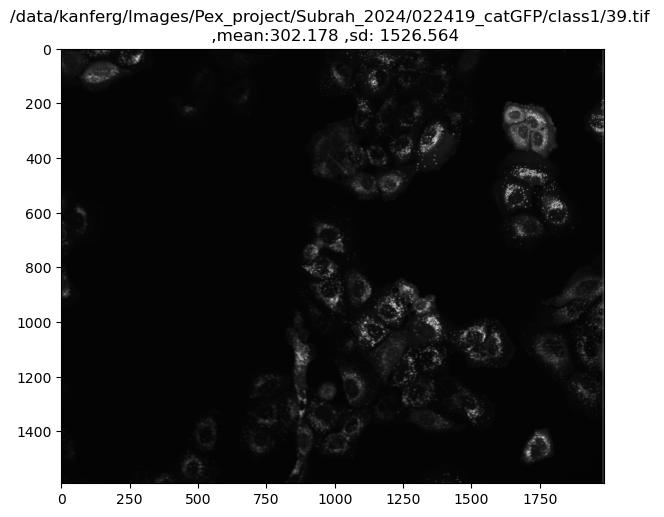

In [25]:
plt.rcParams["figure.figsize"] = (7,7)
fig, axes = plt.subplots(1, 1)
axes.imshow(img)
axes.set_title(f'{name} \n ,mean:{np.round(mean,3)} ,sd: {np.round(sd,3)}')